## CHECKPOINT 1: DATA CLEANING

### Importing Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Datasets
We have 3 datasets to work upon:
-  Companies: Companies basic info
-  Rounds2: Funding Round details
-  Mapping: Classification of sectors

In [103]:
## Detecting the Encoding of datasets
import chardet
with open("companies.csv","rb") as data1:    
    enc1 = chardet.detect(data1.read())
enc1    

{'encoding': 'Windows-1254',
 'confidence': 0.4610845903762258,
 'language': 'Turkish'}

In [104]:
with open("rounds2.csv","rb") as data1:    
    enc2 = chardet.detect(data1.read())
enc2

{'encoding': 'Windows-1254',
 'confidence': 0.4186155476629225,
 'language': 'Turkish'}

In [105]:
## Encoding speicified
companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
mapping = pd.read_csv("mapping.csv")

### Quick look on the datasets

In [106]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [107]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [108]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [109]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


### Unique Companies in both datasets

In [110]:
## Converting permalink and company permalink columns to lower case
companies.permalink = companies.permalink.str.encode('UTF-8').str.decode('ascii','ignore').str.lower()
rounds2.company_permalink = rounds2.company_permalink.str.encode('UTF-8').str.decode('ascii','ignore').str.lower()

In [111]:
#Rounds Unique companies
rounds2.company_permalink.nunique()

66368

In [112]:
#Companies Unique companies
companies.permalink.nunique()

66368

In [113]:
## Checking for companies in the rounds2 file which are not present in companies:
rounds2.company_permalink.isin(companies.permalink).value_counts()

True    114949
Name: company_permalink, dtype: int64

We can see everything is true hence every companies in rounds file are present in companies

### Creating Masterframe

In [114]:
## Using Permalink and company_permalink columns to merge both the datasets
master_frame = pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink',how='inner')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [115]:
## Checking Null percentages for columns
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

We can see significant amount of Null values for the columns 'founded_at', 'funding_round_code' & 'raised_amount_usd'. Since we dont need 'founded_at' & 'funding_round_code' for our analysis, we can simply drop those columns. Also we can drop either of 'permalink' or 'company_permalink' as both of them are present.

In [116]:
## Dropping insignificant columns
master_frame.drop(['company_permalink','funding_round_code','founded_at','homepage_url'],axis=1,inplace=True)

In [117]:
## Taking the data with funding rounds of our concerns only
master_frame = master_frame[(master_frame['funding_round_type'] == 'angel') | 
                             (master_frame['funding_round_type'] == 'venture') | 
                             (master_frame['funding_round_type'] == 'seed') | 
                             (master_frame['funding_round_type'] == 'private_equity')]

Now, since our main analysis is based on the column 'raised_amount_usd', we cannot simply drop the rows with the Null values in that column. Imputing with the mean/median of the column value would not be good choice either as column is well spread. One thing we know that the 'funding_round_type' reflects a general bucket where 'raised_amount_usd' should fall. So a better choice would be impute the Null values according to the 'funding_round_type'.

## Imputing Null Values

In [118]:
## Calclating the median of different funding rounf type
med_angel = master_frame[master_frame.funding_round_type == 'angel'].raised_amount_usd.median()
med_venture = master_frame[master_frame.funding_round_type == 'venture'].raised_amount_usd.median()
med_seed = master_frame[master_frame.funding_round_type == 'seed'].raised_amount_usd.median()
med_private_equity = master_frame[master_frame.funding_round_type == 'private_equity'].raised_amount_usd.median()

In [119]:
## Definig function to impute Null values

def impute(col):
    funding_round_type = col[0]
    raised_amount_usd = col[1]
    
    if ((funding_round_type=='angel') & pd.isnull(raised_amount_usd)):
        return med_angel
    elif ((funding_round_type=='venture') & pd.isnull(raised_amount_usd)):
        return med_venture 
    elif ((funding_round_type=='seed') & pd.isnull(raised_amount_usd)):
        return med_seed 
    elif ((funding_round_type=='private_equity') & pd.isnull(raised_amount_usd)):
        return med_private_equity
    else: return raised_amount_usd

In [120]:
## calling the function
master_frame.raised_amount_usd = master_frame[['funding_round_type','raised_amount_usd']].apply(impute,axis=1)

In [121]:
round(master_frame.isnull().sum()/len(master_frame.index)*100,2)

permalink                 0.00
name                      0.00
category_list             2.65
status                    0.00
country_code              7.76
state_code                9.83
region                    9.07
city                      9.06
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
dtype: float64

Now, we can see there are no Null value in 'raised_amount_usd' column and hence we can proceed with our analysis

## CHECKPOINT 2: Funding Type Analysis

__Need to find the best type of investment for Spark Fund considerind the constraints__

Calulating the median of the four type of investment to find out the most representative amount for each funding type

In [122]:
## Median
pd.options.display.float_format = '{:.2f}'.format
master_frame.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel              400000.00
private_equity   20000000.00
seed               275000.00
venture           5000000.00
Name: raised_amount_usd, dtype: float64

In [123]:
## Mean
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()

funding_round_type
angel              845562.05
private_equity   65166492.82
seed               618960.14
venture          11108520.14
Name: raised_amount_usd, dtype: float64

From both Median and Mean, we can see the funding type which Spark Funds should go with is __VENTURE__ as the it lies between 5 to 15 Million USD. Also, median would be the most representative value as there is significant difference in mean and median mostly due to outliers/

### Filtering the master frame with the investment type Venture only

In [124]:
master_frame_venture = master_frame[(master_frame['funding_round_type'] == 'venture')]   

## CHECKPOINT 3: COUNTRY ANALYSIS

### Need to find the countries with the highest amount of investment
### Top 9 countries with the highest investment

In [125]:
top9_countries = master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9_countries

country_code
USA   433675842796.00
CHN    42450418773.00
GBR    21485627416.00
IND    15231858718.00
CAN    10033332317.00
FRA     7599536732.00
DEU     7486959822.00
ISR     7477514579.00
JPN     3583676611.00
Name: raised_amount_usd, dtype: float64

### Making dataframe with top 9 coutries

In [126]:
top9 = master_frame[master_frame.country_code.isin(top9_countries.index)]
top9.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.00
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00
5,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.00


In [127]:
top9.groupby('country_code').sum().sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
country_code,
USA,526465439172.00
CHN,64227290923.00
GBR,29088629378.00
IND,22390618815.00
CAN,13908584812.00
DEU,10062154828.00
ISR,8818512371.00
FRA,8602399925.00
JPN,4907094203.00


We can clearly see the top 3 English speaking coutries as:
-  __USA__
-  __GBR__
-  __IND__

In [128]:
## Retaining only top 3 english coutries as Spark fund will invest only in these contries
top3 = top9[(top9['country_code'] == 'USA')| 
            (top9['country_code'] == 'GBR')|
            (top9['country_code'] == 'IND')]

## CHECKPOINT 4: SECTOR ANALYSIS

### Need to extract the primary sector from the column 'category_list' column and map it with the 8 main sectors present in the mapping file

First entry in the category_list column can be considered as the primary sector for that row

In [129]:
## Extracting Primary sectors
top3['primary_sector'] = top9.category_list.str.split('|',expand=True)[0]
top3.head()

,permalink,name,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,Media
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.00,Application Platforms
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00,Application Platforms
5,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.00,Software
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.00,Analytics


In [130]:
## Examining Mapping file
mapping = pd.read_csv("mapping.csv")
mapping.head(25)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


We can see a strange pattern in the category_list columnn like in row 20 and 22, there is 0 inplace of 'na'. On inspecting the csv file, we found there are number of same cases so we need to correct the format.

In [131]:
mapping.drop(0,inplace=True)
mapping.category_list.replace({'0':'na'},regex=True,inplace=True)

### Unpivoting the mapping dataframe and creating a main sector column

In [132]:
mapping = pd.melt(mapping,id_vars=['category_list'],value_vars=['Automotive & Sports',
                                                                'Blanks',
                                                                'Cleantech / Semiconductors',
                                                                'Entertainment',
                                                                'Health',
                                                                'Manufacturing',
                                                                'News, Search and Messaging',
                                                                'Others',
                                                                'Social, Finance, Analytics, Advertising'])

In [133]:
mapping

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [134]:
## Dropping the rows with value 0, then dropping the value column and finally renaming the column variable as 'main_sector'
mapping = mapping[mapping.value==1]
mapping.drop('value',axis=1,inplace=True)
mapping.rename(columns={'variable':'main_sector'},inplace=True)
mapping.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


### Now need to merge the top3 dataframe with mapping

In [135]:
## Coverting the columnn from both df to upper case
mapping.category_list = mapping.category_list.str.upper()
top3.primary_sector = top3.primary_sector.str.upper()

In [136]:
## Merging both the dataset
top3 = pd.merge(top3,mapping,left_on='primary_sector',right_on='category_list',how='left')

In [137]:
top3.head()

,permalink,name,category_list_x,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list_y,main_sector
0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,MEDIA,MEDIA,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,5000000.00,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00,APPLICATION PLATFORMS,APPLICATION PLATFORMS,"News, Search and Messaging"
3,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,5000000.00,SOFTWARE,SOFTWARE,Others
4,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.00,ANALYTICS,ANALYTICS,"Social, Finance, Analytics, Advertising"


In [138]:
top3.isnull().sum()/len(top3.index)*100

permalink                 0.00
name                      0.00
category_list_x           1.13
status                    0.00
country_code              0.00
state_code                0.26
region                    0.51
city                      0.51
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
primary_sector            1.13
category_list_y           1.19
main_sector               1.19
dtype: float64

In [139]:
## Dropping the rows with the main sector as null values as the percentage is around 1%
top3 = top3[~top3.main_sector.isnull()]

In [140]:
## dropping repating columns
top3.drop('category_list_y',axis=1,inplace=True)

In [141]:
top3.isnull().sum()/len(top3.index)*100

permalink                 0.00
name                      0.00
category_list_x           0.00
status                    0.00
country_code              0.00
state_code                0.26
region                    0.50
city                      0.50
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
primary_sector            0.00
main_sector               0.00
dtype: float64

## CHECKPONT 5: SECTOR ANALYSIS 2

### Need to find out the most heavily invested main sectors in these top 3 countries

### Sector Analysis: USA

In [142]:
## creating D1
D1 = top3[(top3.country_code=='USA') &
          (top3.raised_amount_usd >= 5000000) &
          (top3.raised_amount_usd <= 15000000)]
D1.raised_amount_usd.agg(['count','sum'])

count          14634.00
sum     122200387291.00
Name: raised_amount_usd, dtype: float64

In [143]:
## Finding the top 3 sectors with most number of investemnts
D1.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending = False).head(3)

,count,sum
main_sector,,
Others,3493,29358828149.00
"Social, Finance, Analytics, Advertising",3405,27560842626.00
Cleantech / Semiconductors,2738,24076707229.00


In [166]:
## Finding the top companies with highest investment for the top sector (count-wise)
D1_mainsector = D1[D1.main_sector=='Others']
D1_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                        name             
/organization/virtustream        Virtustream         64300000.00
/organization/emn8               Tillster            61198945.00
/organization/capella            Capella Photonics   54968051.00
/organization/airtight-networks  AirTight Networks   54201907.00
/organization/decarta            deCarta             52100000.00
                                                         ...    
/organization/infor              Infor                5000000.00
/organization/indeni             indeni               5000000.00
/organization/incentive-logic    Incentive Logic      5000000.00
/organization/idealresponse      iDealResponse        5000000.00
/organization/004-technologies   004 Technologies     5000000.00
Name: raised_amount_usd, Length: 2389, dtype: float64

In [165]:
## Finding the top companies with highest investment for the 2nd top sector (count-wise)
D1_mainsector = D1[D1.main_sector=='Social, Finance, Analytics, Advertising']
D1_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                          name                           
/organization/choicestream         ChoiceStream                      73300000.00
/organization/shotspotter          SST Inc. (Formerly ShotSpotter)   67933006.00
/organization/intacct              Intacct                           66800000.00
/organization/demandbase           Demandbase                        63000000.00
/organization/powerhouse-dynamics  Powerhouse Dynamics               61300000.00
                                                                         ...    
/organization/identified-com       Identified                         5000000.00
/organization/businesscard2        Workface                           5000000.00
/organization/igaworldwide         IGA Worldwide                      5000000.00
/organization/multistat            Multistat                          5000000.00
/organization/incubet              incuBET                            5000000.00
Name: raised_amount_usd, Length: 2270, dty

### Sector Analysis: GBR

In [146]:
## creating D2
D2 = top3[(top3.country_code=='GBR') &
          (top3.raised_amount_usd >= 5000000) &
          (top3.raised_amount_usd <= 15000000)]
D2.raised_amount_usd.agg(['count','sum'])

count          880.00
sum     6782954540.00
Name: raised_amount_usd, dtype: float64

In [147]:
## Finding the top 3 sectors with most number of investemnts
D2.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending = False).head(3)

,count,sum
main_sector,,
Others,217,1652944436.00
"Social, Finance, Analytics, Advertising",203,1473555728.00
Cleantech / Semiconductors,157,1309424208.00


In [163]:
## Finding the top companies with highest investment for the top sector (count-wise)
D2_mainsector = D2[D2.main_sector=='Others']
D2_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                         name              
/organization/electric-cloud      Electric Cloud       37000000.00
/organization/notonthehighstreet  Notonthehighstreet   36900000.00
/organization/sensage             SenSage              36250000.00
/organization/enigmatic           Enigmatec            32500000.00
/organization/ip-access           ip.access            30000000.00
                                                           ...    
/organization/the-carrot-company  The Carrot Company    5000000.00
/organization/thefilter           The Filter            5000000.00
/organization/getlenses-co-uk     Getlenses.co.uk       5000000.00
/organization/oxyntix             Oxyntix               5000000.00
/organization/achica              ACHICA                5000000.00
Name: raised_amount_usd, Length: 170, dtype: float64

In [164]:
## Finding the top companies with highest investment for the 2nd top sector (count-wise)
D2_mainsector = D2[D2.main_sector=='Social, Finance, Analytics, Advertising']
D2_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                            name                 
/organization/zopa                   Zopa                    37900000.00
/organization/celltick-technologies  Celltick Technologies   37500000.00
/organization/mythings               myThings                34000000.00
/organization/arkex                  ARKeX                   31217029.00
/organization/sumup                  SumUp                   29293649.00
                                                                 ...    
/organization/capablue               Capablue                 5000000.00
/organization/buying-butler          Buying Butler            5000000.00
/organization/myriada-systems        Myriada Systems          5000000.00
/organization/brainjuicer            Brainjuicer              5000000.00
/organization/commerce-decisions     Commerce Decisions       5000000.00
Name: raised_amount_usd, Length: 155, dtype: float64

### Sector Analysis: IND

In [150]:
## creating D3
D3 = top3[(top3.country_code=='IND') &
          (top3.raised_amount_usd >= 5000000) &
          (top3.raised_amount_usd <= 15000000)]
D3.raised_amount_usd.agg(['count','sum'])

count          505.00
sum     3863543602.00
Name: raised_amount_usd, dtype: float64

In [151]:
## Finding the top 3 sectors with most number of investemnts
D3.groupby('main_sector')['raised_amount_usd'].agg(['count','sum']).sort_values('count',ascending = False).head(3)

,count,sum
main_sector,,
Others,162,1285909507.00
"Social, Finance, Analytics, Advertising",110,803449550.00
"News, Search and Messaging",77,559834545.00


In [162]:
## Finding the top companies with highest investment for the top sector (count-wise)
D3_mainsector = D3[D3.main_sector=='Others']
D3_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                                                                             name                                                                    
/organization/firstcry-com                                                            FirstCry.com                                                               39000000.00
/organization/myntra                                                                  Myntra                                                                     38000000.00
/organization/commonfloor                                                             CommonFloor                                                                32900000.00
/organization/pepperfry-com                                                           Pepperfry.com                                                              28000000.00
/organization/maharana-infrastructure-and-professional-services-private-limited-mips  Maharana Infrastructure and Professional Services Private Limit

In [161]:
## Finding the top companies with highest investment for the 2nd top sector (count-wise)
D3_mainsector = D3[D3.main_sector=='Social, Finance, Analytics, Advertising']
D3_mainsector.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)

permalink                                       name                            
/organization/manthan-systems                   Manthan Systems                    50700000.00
/organization/komli-media                       Komli Media                        28000000.00
/organization/shopclues-com                     ShopClues.com                      25000000.00
/organization/intarvo                           inTarvo                            21900000.00
/organization/grameen-financial-services        Grameen Financial Services         21556050.00
                                                                                       ...    
/organization/ifmr-rural-channels-and-services  IFMR Rural Channels and Services    5000000.00
/organization/idream-career                     iDream Career                       5000000.00
/organization/ideacts-innovations               ideacts innovations                 5000000.00
/organization/golflan                           GolfLAN         

## CHECKPOINT 6: PLOTS

### 1. Plot showing representative amount of funding in each funding type

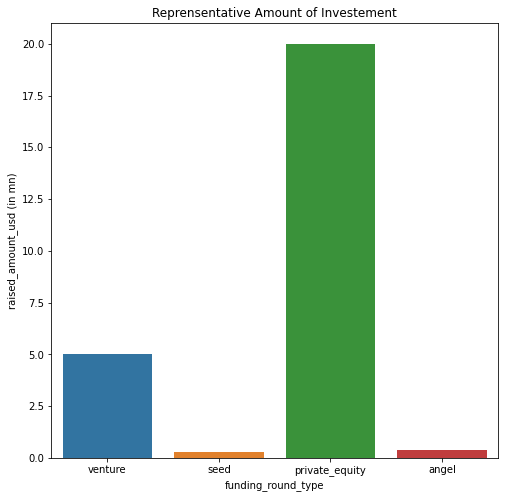

In [154]:
plt.figure(figsize=(8,8))
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.median)
plt.ylabel("raised_amount_usd (in mn)")
plt.title("Reprensentative Amount of Investement")
plt.show()

We can see from the above bar plot that 'Venture' is the funding type which is best for Spark funds to invest as it meets the criteria of 5 to 15 mn USD.

### 2. Plot showing the top 9 countries against the total amount of investments 

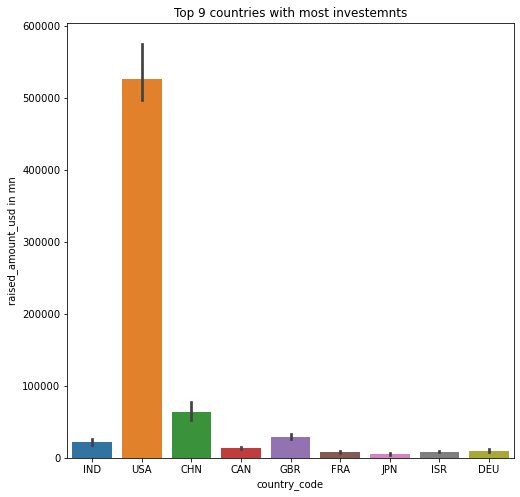

In [155]:
plt.figure(figsize=(8,8))
sns.barplot(x=top9['country_code'],y=(top9['raised_amount_usd']/1000000),estimator=sum)
plt.ylabel("raised_amount_usd in mn")
plt.title("Top 9 countries with most investemnts")
plt.show()

### 3. Plot showing the number of investments in the top 3 sectors of the top 3 countries

In [156]:
## Creating Dataframes from D1,D2 & D3 and combining them.
D1_g1 = pd.DataFrame(D1.groupby(['main_sector','country_code'])['raised_amount_usd'].count().sort_values(ascending=False).head(3))
D2_g2 = pd.DataFrame(D2.groupby(['main_sector','country_code'])['raised_amount_usd'].count().sort_values(ascending=False).head(3))
D3_g3 = pd.DataFrame(D3.groupby(['main_sector','country_code'])['raised_amount_usd'].count().sort_values(ascending=False).head(3))

In [157]:
frame = [D1_g1,D2_g2,D3_g3]

In [158]:
D123 = pd.concat(frame)
D123 = pd.DataFrame(D123)
D123.reset_index(inplace=True)

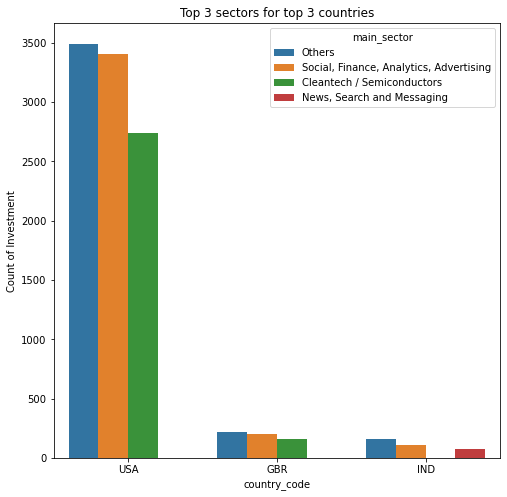

In [159]:
plt.figure(figsize=(8,8))
sns.barplot(x=D123['country_code'],y=(D123['raised_amount_usd']),hue=D123['main_sector'])
plt.ylabel("Count of Investment")
plt.title("Top 3 sectors for top 3 countries")
plt.show()